# Phantom Power Draw Data Collection
- location: Leslie eLab
- start date: 2015-03-25
- devices:
    + 1: White Hitachi Projector in Lean
    + 2: N/A
    + 3: Black Vaddio Camera in Lean
    + 4: N/A
    + 5: N/A
    + 6: Printer in Main Room

In [1]:
# Imports
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.__version__

Populating the interactive namespace from numpy and matplotlib


'0.15.2'

In [2]:
# Read in data from csv file.
columns = ["time", "sensor", "power"]
path = "data.csv"
dateparse = lambda x: pd.datetime.fromtimestamp(float(x))
data = pd.read_csv(path, names=columns, parse_dates=[0], date_parser=dateparse, index_col='time')

In [3]:
data.head()

,sensor,power
time,,
2015-03-25 13:40:17.490000,WeMo6,19910
2015-03-25 13:48:20.329999,WeMo6,21155
2015-03-25 13:48:20.640000,WeMo1,205715
2015-03-25 13:48:20.930000,WeMo3,11065
2015-03-25 13:48:21.240000,WeMo6,21175


In [4]:
# convert milliwatts into watts
data['power'] /= 1000
groups = data.groupby(data.sensor)

sensor
WeMo1     Axes(0.125,0.2;0.775x0.7)
WeMo3     Axes(0.125,0.2;0.775x0.7)
WeMo6     Axes(0.125,0.2;0.775x0.7)
dtype: object

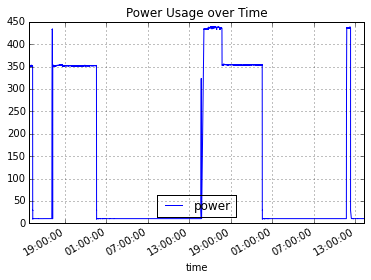

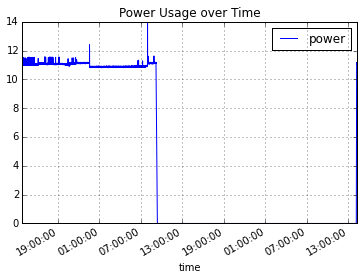

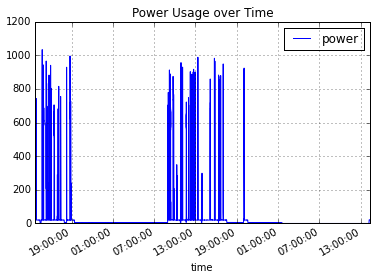

In [5]:
groups.plot(title="Power Usage over Time")

## Project Notes
Adam Cragg, the manager of the Entrepreneurship Lab, noted that the printer and camera had power issues. Both devices were found powered off Thursday morning, even though no `power off` commmands had been sent to the attached Wemos.

During installation, the sensors required that they connect to the router before allowing power to get to the attached device, frustrating Adam. On average, to install a sensor, it took 5 to 10 minutes. All of the sensors had connectivity issues.

## What was the time between samples?
Was the time between samples consistent? Is it correlated with the sensor_id?

In [6]:
diff = pd.Series(data.index).diff()
diff.head()

0               NaT
1   00:08:02.839999
2   00:00:00.310001
3   00:00:00.290000
4   00:00:00.310000
Name: time, dtype: timedelta64[ns]

In [7]:
# convert to seconds
seconds = diff.apply(lambda x: x / np.timedelta64(1, 's'))
seconds.head()

0           NaN
1    482.839999
2      0.310001
3      0.290000
4      0.310000
Name: time, dtype: float64

In [8]:
# remove outliers
seconds.describe()

count    314252.000000
mean          0.556884
std           4.357792
min           0.269999
25%           0.300000
50%           0.309999
75%           0.320000
max        1221.130001
Name: time, dtype: float64

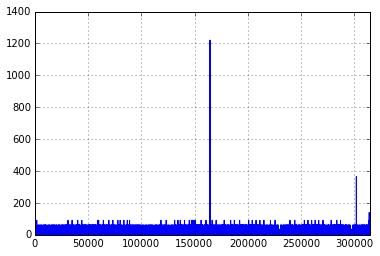

In [9]:
seconds.plot()

In [10]:
# remove outliers more than three standard deviations away.
outlier_threshold = 3*seconds.std()
no_outliers = seconds[~((seconds-seconds.mean()).abs()>outlier_threshold)]

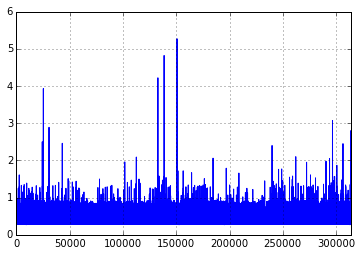

In [11]:
no_outliers.plot()

In [12]:
no_outliers.describe()

count    312793.000000
mean          0.316224
std           0.058703
min           0.269999
25%           0.300000
50%           0.309999
75%           0.320000
max           5.270000
Name: time, dtype: float64